This notebook contains the functions used to generate figures and results in my MSc thesis [1].

**Module Imports**

In [1]:
import fractalnetworks as fn

# Network analysis modules
import networkx as nx
from igraph import Graph
import igraph

# Mathematics modules
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import numpy as np
import random

<h1> Preliminaries

<h2> Graph Theory


<h2> Network Science

<h1>1 Classical Fractal Geometry

<h2>1.1 Fractal Dimension

<h1>2 Fractal Networks

<h2>2.1 Fractal Dimensions of Networks

<h2>2.2 Importance of Fractal Networks

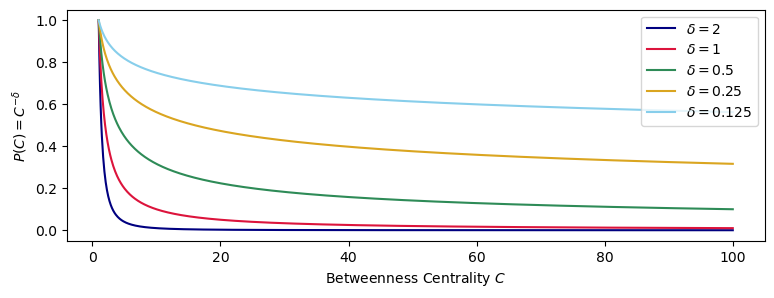

In [5]:
plt.figure(figsize=(9,3))
x = np.linspace(1,100,1001)
y2 = [xi ** (-2) for xi in x]
plt.plot(x, y2, color = "navy", label = "$\delta = 2$")
y1 = [xi ** (-1) for xi in x]
plt.plot(x, y1, color = "crimson", label = "$\delta = 1$")
y05 = [xi ** (-0.5) for xi in x]
plt.plot(x, y05, color = "seagreen", label = "$\delta = 0.5$")
y025 = [xi ** (-0.25) for xi in x]
plt.plot(x, y025, color = "goldenrod", label = "$\delta = 0.25$")
y0125 = [xi ** (-0.125) for xi in x]
plt.plot(x, y0125, color = "skyblue", label = "$\delta = 0.125$")
plt.legend()
plt.ylabel("$P(C) = C^{-\delta}$")
plt.xlabel("Betweenness Centrality $C$")
plt.show()


<h1>4 Origins of Fractality

<h2> 4.2 Fractal Skeletons

<h1> 5 Fractal Network Models

<h2> 5.1 Song-Havlin-Makse (SHM) Model

The following code displays the first four generations of a SHM network with $p=0$, as seen in Figure 9(a) [1] 

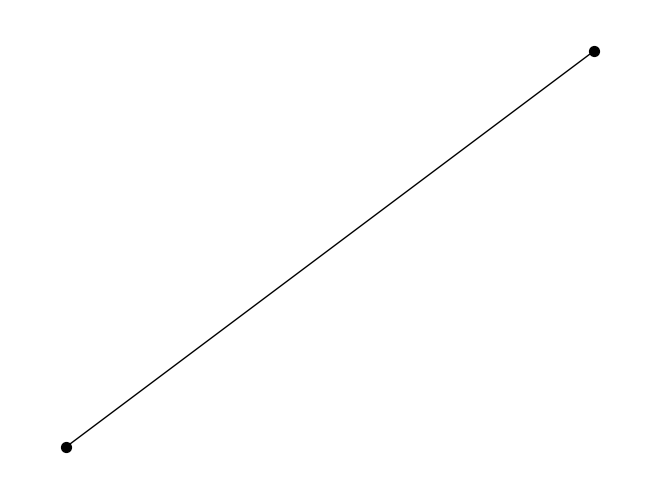

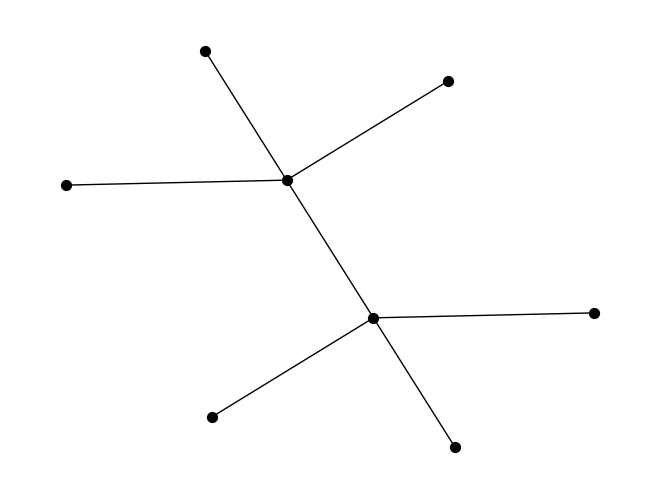

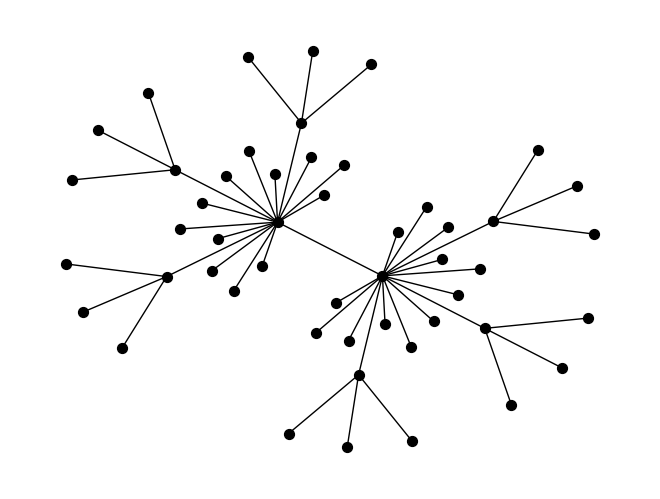

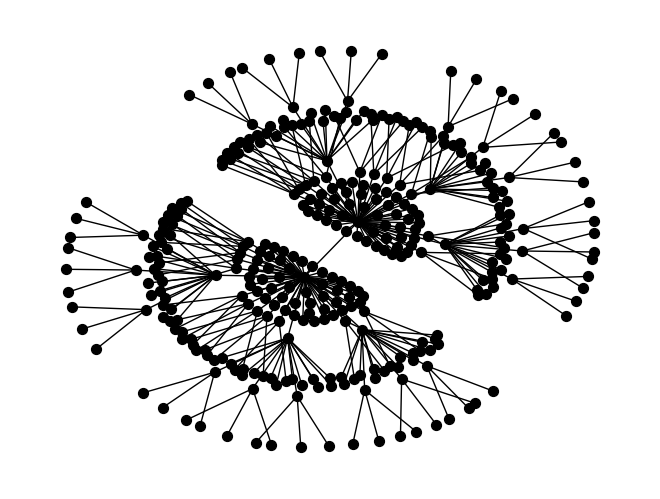

In [7]:
# Initialise parameters
m = 3
p = 0
N = 4

# In the first generation the network is a path of length 2. 
G = nx.path_graph(2)
nx.draw_kamada_kawai(G, node_size=50, node_color = "black")
plt.show()

# Generate the next generation N-1 times. 
for i in range(N-1):
    G = fn.SHM_iteration(G, m, p)
    # Draw the network
    nx.draw_kamada_kawai(G, node_size=50, node_color = "black")
    plt.show()

The following code displays the first four generations of a SHM network with $p=0.5$, as seen in Figure 9(b) [1] 

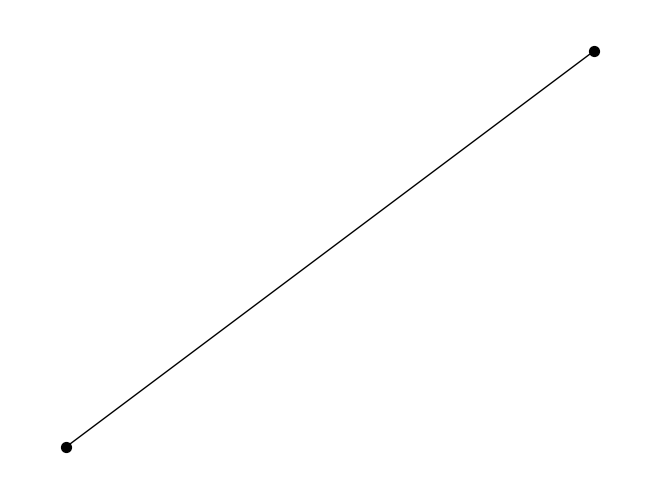

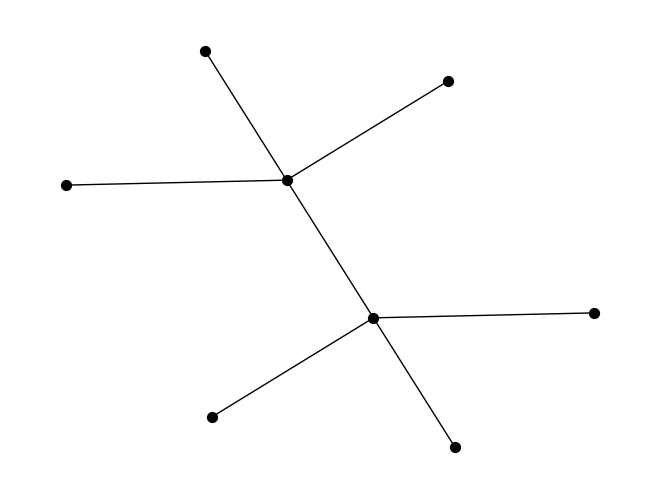

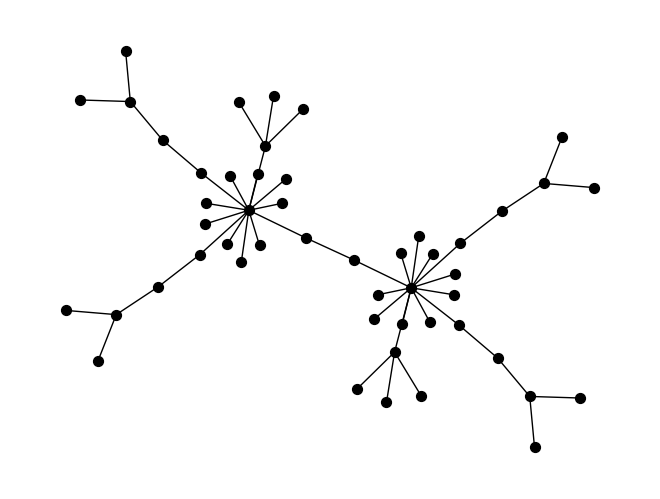

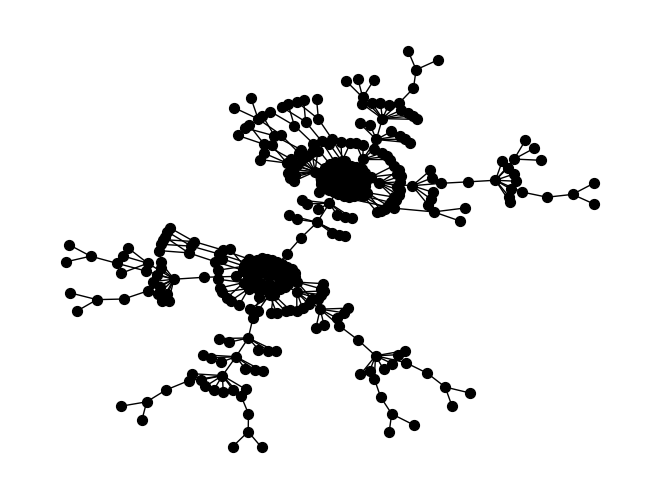

In [8]:
# Initialise parameters
m = 3
p = 0.5
N = 4

# In the first generation the network is a path of length 2. 
G = nx.path_graph(2)
nx.draw_kamada_kawai(G, node_size=50, node_color = "black")
plt.show()

# Generate the next generation N-1 times. 
for i in range(N-1):
    G = fn.SHM_iteration(G, m, p)
    # Draw the network
    nx.draw_kamada_kawai(G, node_size=50, node_color = "black")
    plt.show()

The following code displays the first four generations of a SHM network with $p=1$, as seen in Figure 9(c) [1] 

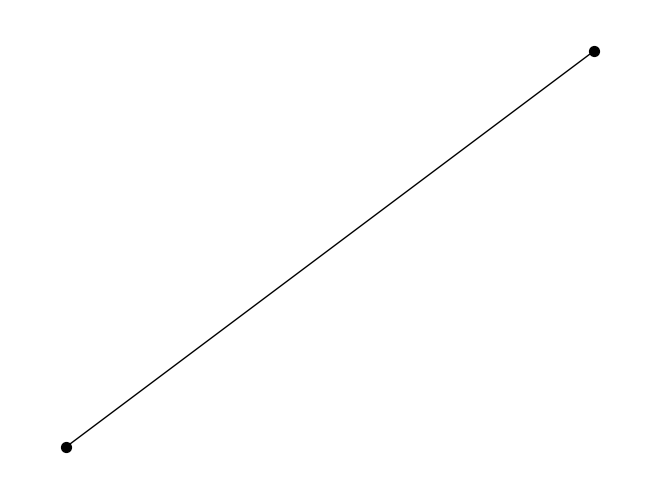

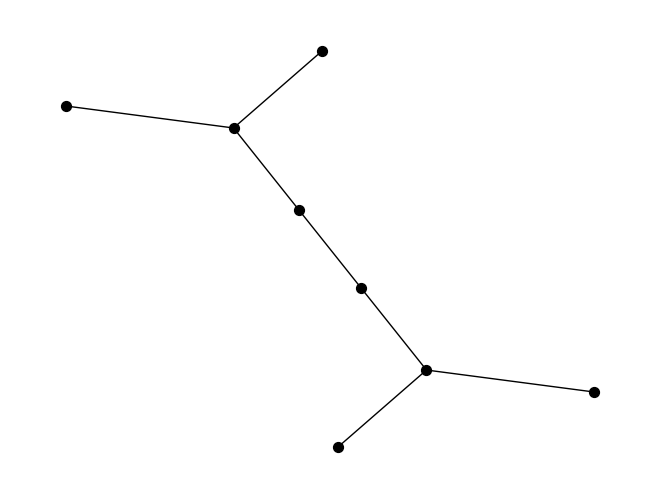

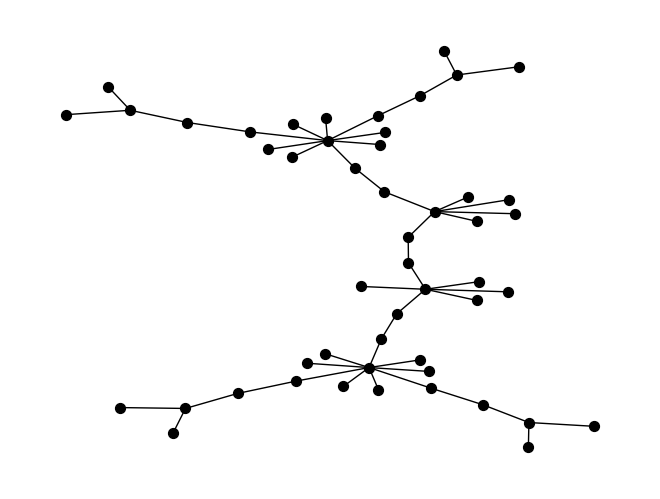

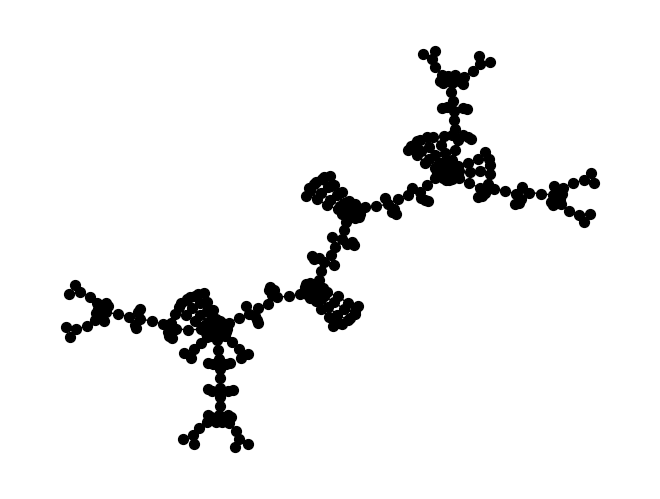

In [13]:
# Initialise parameters
m = 3
p = 1
N = 4

# In the first generation the network is a path of length 2. 
G = nx.path_graph(2)
nx.draw_kamada_kawai(G, node_size=50, node_color = "black")
plt.show()

# Generate the next generation N-1 times. 
for i in range(N-1):
    G = fn.SHM_iteration(G, m, p)
    # Draw the network
    nx.draw_kamada_kawai(G, node_size=50, node_color = "black")
    plt.show()

To show the scale-free property of SHM networks we use `check_SHM_p0_lambda`. This function produces the graph in Figure 10 [1].

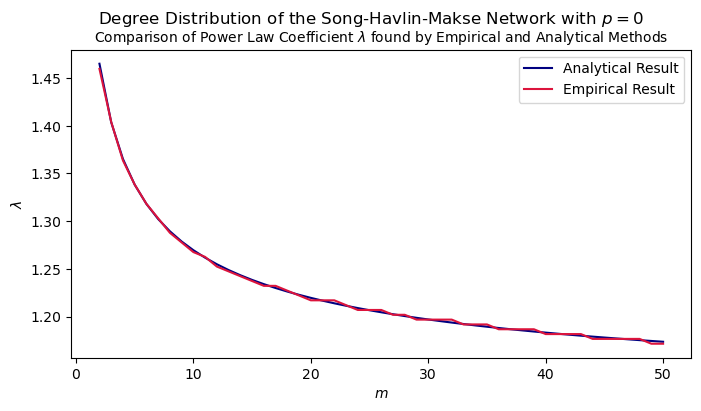

In [19]:
_, _ = fn.check_SHM_p0_lambda(50, 25, plot=True)

<h2> 5.2 Hub Attraction Dynamical Growth (HADG) Model

The following code produces examples of HADG networks which nodes coloured and sized according to the generation in which they originated. Figure 11 [1] is generated with this code. 

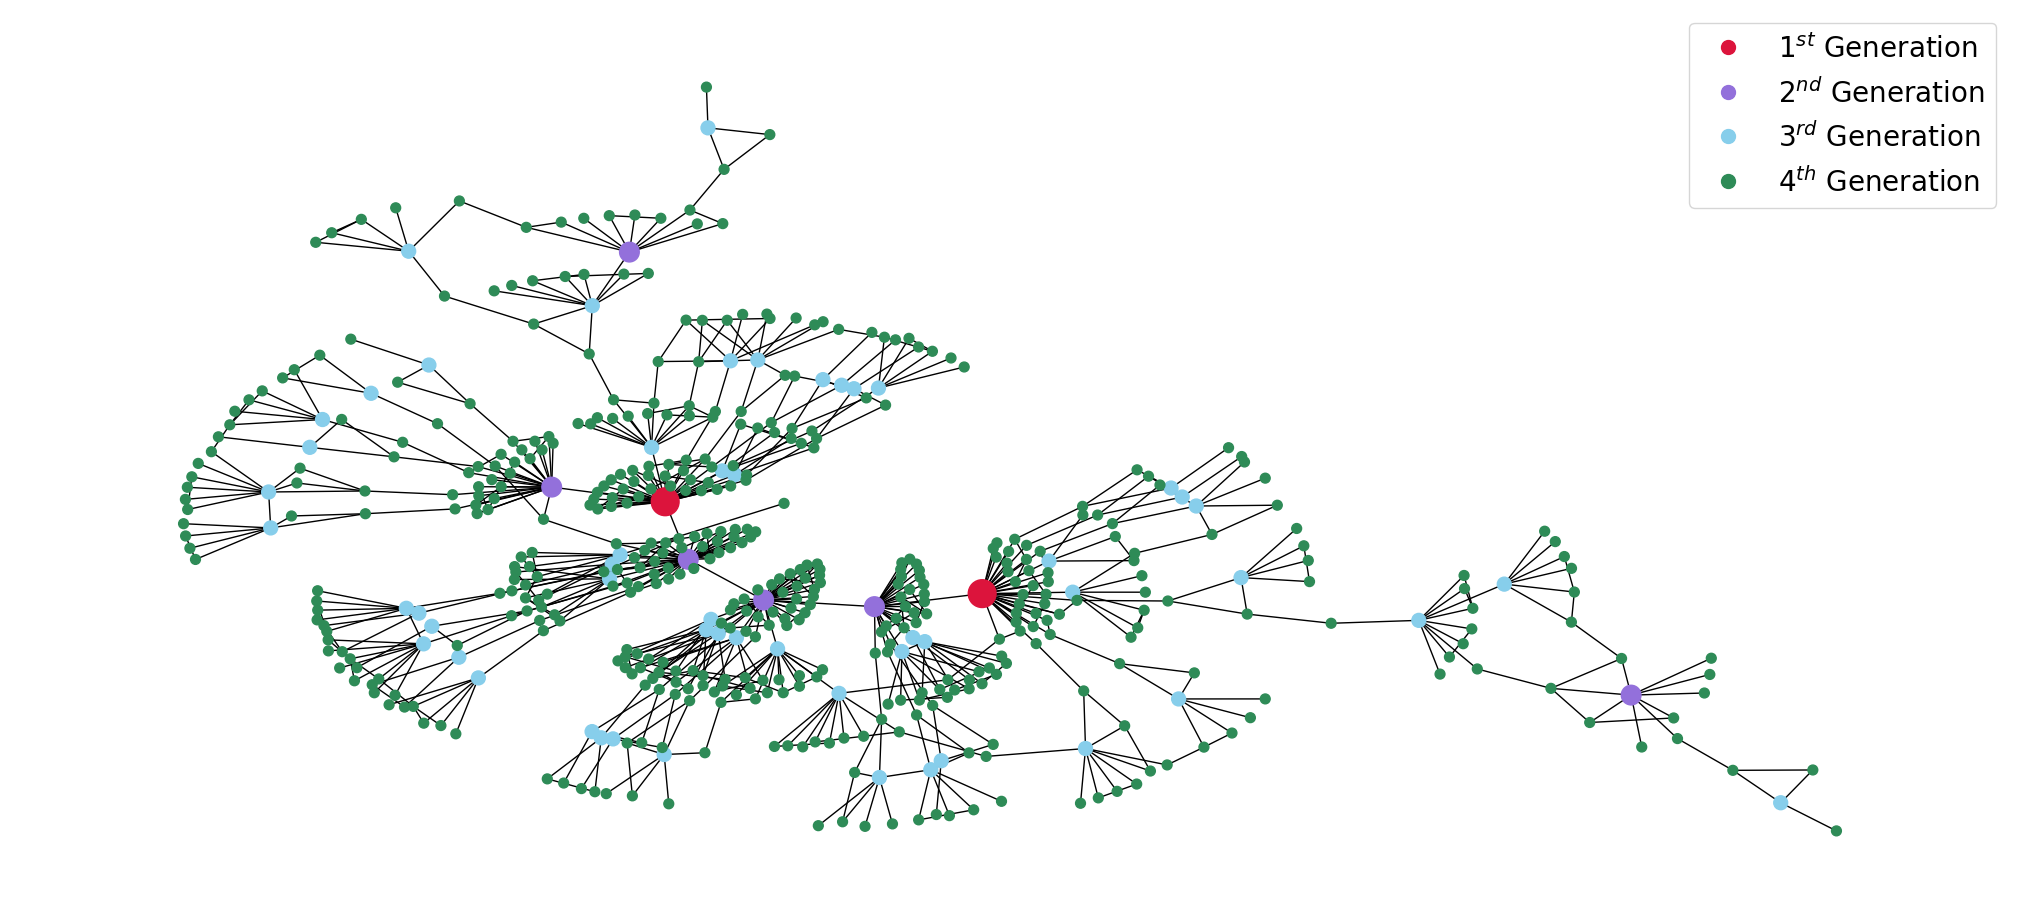

In [21]:
# Initialise parameters
N = 4
m = 3
a = 0.25
b = 0.75
T = 0.5

# Initialise a path network
G = nx.path_graph(2)
gen1_nodes = list(G.nodes()) # At each stage save a list of nodes in the network.
    
# Apply the generative process N times. 
G = fn.HADG_iteration(G, m, a, b, T)
gen2_nodes = list(G.nodes())

G = fn.HADG_iteration(G, m, a, b, T)
gen3_nodes = list(G.nodes())

G = fn.HADG_iteration(G, m, a, b, T)
gen4_nodes = list(G.nodes())

# Initialise empty dictionaries to store the colour and size of nodes. 
colourmap = {}
sizemap = {}

for node in G:
    
    # Nodes from the first generation are large and red.
    if node in gen1_nodes:
        colourmap[node] = "crimson"
        sizemap[node] = 400
    
    # Nodes from the second generation are medium size and purple.
    elif node in gen2_nodes:
        colourmap[node] = "mediumpurple"
        sizemap[node] = 200
        
    # Nodes from the third generation are small and blue.
    elif node in gen3_nodes:
        colourmap[node] = "skyblue"
        sizemap[node] = 100
        
    # Nodes from the fourth generation are tiny and green.
    elif node in gen4_nodes:
        colourmap[node] = "seagreen"
        sizemap[node] = 50
        
# Make lists of sizes and colours for nodes
# This is the format networkx takes these arguments in.
colourlist = [colourmap[i] for i in G.nodes()]
sizelist = [sizemap[i] for i in G.nodes()]

# Calculate the position of ndoes
pos = nx.kamada_kawai_layout(G, scale=100)

# Draw network
plt.figure(figsize=(20,9))
nx.draw(G, pos=pos, node_size=sizelist, node_color=colourlist)

# Add legend
crimson_patch = mlines.Line2D([], [], color='crimson', fillstyle='full', marker='o', linestyle='None',
                          markersize=10, label="$1^{st}$ Generation")
purple_patch = mlines.Line2D([], [], color='mediumpurple', fillstyle='full', marker='o', linestyle='None',
                          markersize=10, label="$2^{nd}$ Generation")
blue_patch = mlines.Line2D([], [], color='skyblue', fillstyle='full', marker='o', linestyle='None',
                          markersize=10, label="$3^{rd}$ Generation")
green_patch = mlines.Line2D([], [], color='seagreen', fillstyle='full', marker='o', linestyle='None',
                          markersize=10, label="$4^{th}$ Generation")
plt.legend(handles=[crimson_patch, purple_patch, blue_patch, green_patch], fontsize=20)

# Show figure
plt.show()

<h2> 5.3 $(u,v)$-Flower Model

The following code draws the first 4 generations of a non-fractal $(1,4)$-flower, as seen in Figure 12(a) [1].

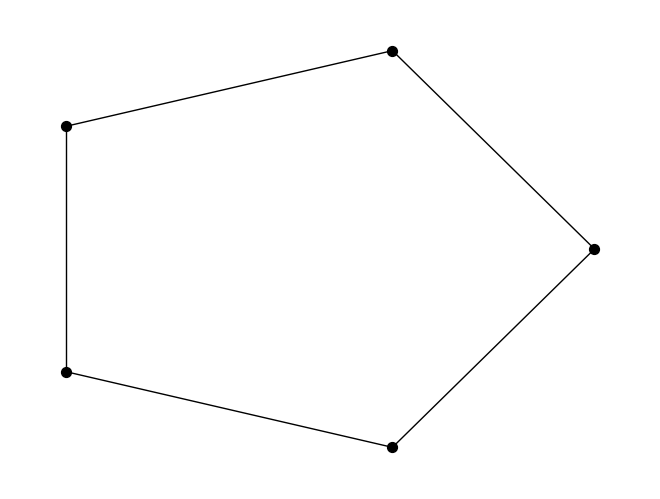

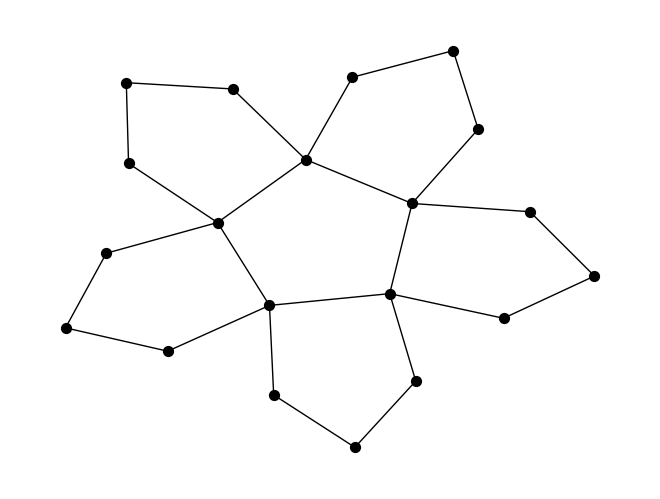

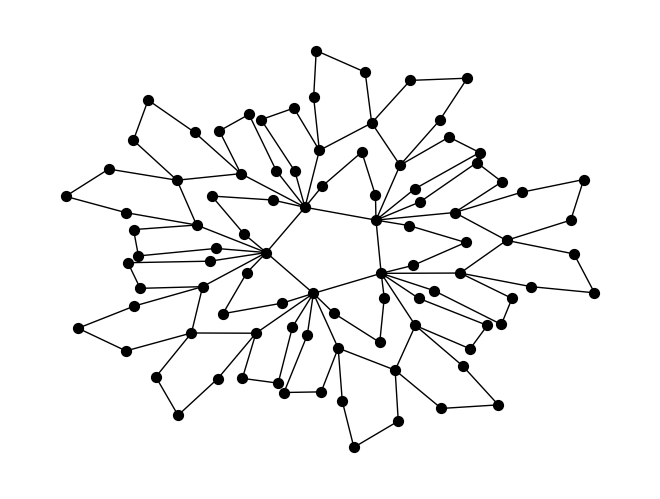

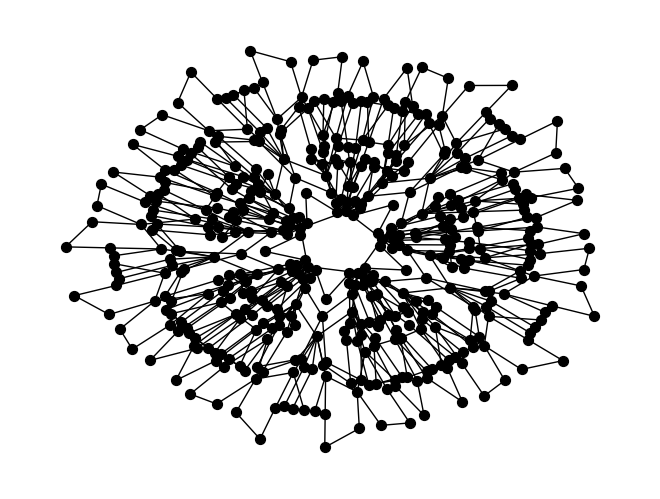

In [23]:
# Initialise parameters
u = 1
v = 4
N = 4

# Generate a (u,v) flower of each generation and display it
for n in range(1, N+1):
    G = fn.generate_uv_flower(u, v, n)
    nx.draw_kamada_kawai(G, node_size=50, node_color = "black")
    plt.show()

The following code draws the first 4 generations of a fractal $(2,3)$-flower, as seen in Figure 12(b) [1].

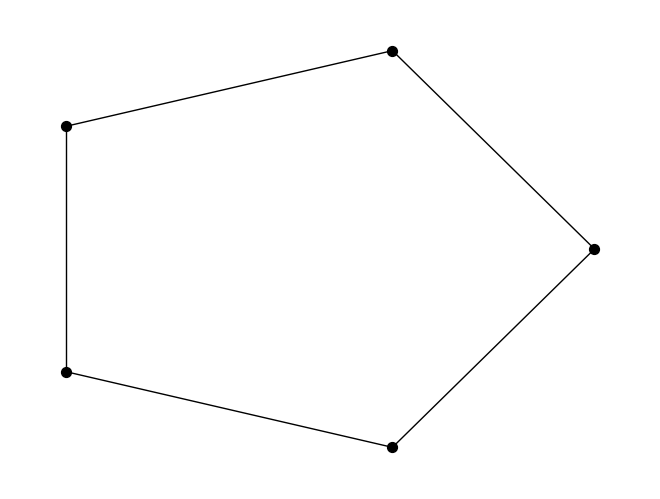

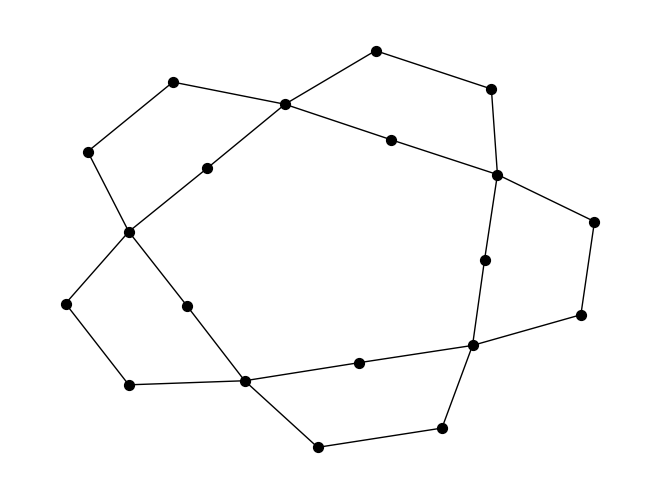

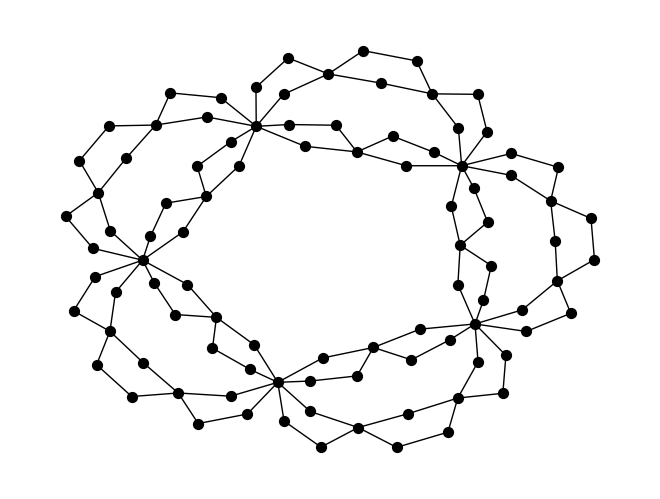

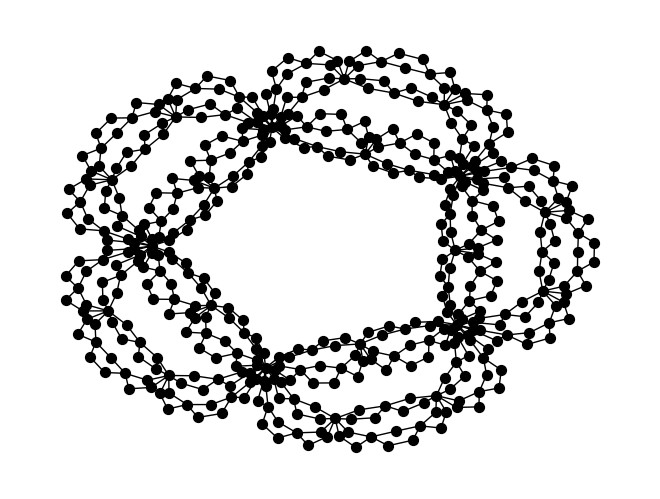

In [24]:
# Initialise parameters
u = 2
v = 3
N = 4

# Generate a (u,v) flower of each generation and display it
for n in range(1, N+1):
    G = fn.generate_uv_flower(u, v, n)
    nx.draw_kamada_kawai(G, node_size=50, node_color = "black")
    plt.show()

<h1> 6 Methods

<h2> 6.1 Box-Covering Algorithms

* Need to write up the code for generating this as a function

**Comparing the Random Sequen

<h1>7 Data

<h2> 7.1 Mathematical Models

<h3> 7.1.1 Song-Havlin-Makse (SHM) Model

In [3]:
# Fractal SHM Networks with parameters m=1, N=8
fractal_SHM_1_8_08_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.8-generation8-example1.gml")
fractal_SHM_1_8_08_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.8-generation8-example2.gml")
fractal_SHM_1_8_08_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.8-generation8-example3.gml")
fractal_SHM_1_8_08_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.8-generation8-example4.gml")
fractal_SHM_1_8_08_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.8-generation8-example5.gml")

fractal_SHM_1_8_09_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.9-generation8-example1.gml")
fractal_SHM_1_8_09_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.9-generation8-example2.gml")
fractal_SHM_1_8_09_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.9-generation8-example3.gml")
fractal_SHM_1_8_09_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.9-generation8-example4.gml")
fractal_SHM_1_8_09_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.9-generation8-example5.gml")

fractal_SHM_1_8_10 = Graph.Load("network-files/models/SHM-model/SHM-model-1-1.0-generation8-example1.gml")


# Fractal SHM Networks with parameters m=2, N=6
fractal_SHM_2_6_08_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.8-generation6-example1.gml")
fractal_SHM_2_6_08_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.8-generation6-example2.gml")
fractal_SHM_2_6_08_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.8-generation6-example3.gml")
fractal_SHM_2_6_08_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.8-generation6-example4.gml")
fractal_SHM_2_6_08_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.8-generation6-example5.gml")

fractal_SHM_2_6_09_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.9-generation6-example1.gml")
fractal_SHM_2_6_09_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.9-generation6-example2.gml")
fractal_SHM_2_6_09_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.9-generation6-example3.gml")
fractal_SHM_2_6_09_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.9-generation6-example4.gml")
fractal_SHM_2_6_09_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.9-generation6-example5.gml")

fractal_SHM_2_6_10 = Graph.Load("network-files/models/SHM-model/SHM-model-2-1.0-generation6-example1.gml")



# Fractal SHM Networks with parameters m=3, N=5
fractal_SHM_3_5_08_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.8-generation5-example1.gml")
fractal_SHM_3_5_08_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.8-generation5-example2.gml")
fractal_SHM_3_5_08_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.8-generation5-example3.gml")
fractal_SHM_3_5_08_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.8-generation5-example4.gml")
fractal_SHM_3_5_08_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.8-generation5-example5.gml")

fractal_SHM_3_5_09_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.9-generation5-example1.gml")
fractal_SHM_3_5_09_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.9-generation5-example2.gml")
fractal_SHM_3_5_09_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.9-generation5-example3.gml")
fractal_SHM_3_5_09_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.9-generation5-example4.gml")
fractal_SHM_3_5_09_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.9-generation5-example5.gml")

fractal_SHM_3_5_10 = Graph.Load("network-files/models/SHM-model/SHM-model-3-1.0-generation5-example1.gml")


# Fractal SHM Networks with parameters m=6, N=4
fractal_SHM_6_4_08_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.8-generation4-example1.gml")
fractal_SHM_6_4_08_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.8-generation4-example2.gml")
fractal_SHM_6_4_08_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.8-generation4-example3.gml")
fractal_SHM_6_4_08_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.8-generation4-example4.gml")
fractal_SHM_6_4_08_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.8-generation4-example5.gml")

fractal_SHM_6_4_09_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.9-generation4-example1.gml")
fractal_SHM_6_4_09_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.9-generation4-example2.gml")
fractal_SHM_6_4_09_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.9-generation4-example3.gml")
fractal_SHM_6_4_09_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.9-generation4-example4.gml")
fractal_SHM_6_4_09_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.9-generation4-example5.gml")

fractal_SHM_6_4_10 = Graph.Load("network-files/models/SHM-model/SHM-model-6-1.0-generation4-example1.gml")


# Fractal SHM Networks with parameters m=7, N=4
fractal_SHM_7_4_08_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.8-generation4-example1.gml")
fractal_SHM_7_4_08_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.8-generation4-example2.gml")
fractal_SHM_7_4_08_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.8-generation4-example3.gml")
fractal_SHM_7_4_08_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.8-generation4-example4.gml")
fractal_SHM_7_4_08_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.8-generation4-example5.gml")

fractal_SHM_7_4_09_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.9-generation4-example1.gml")
fractal_SHM_7_4_09_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.9-generation4-example2.gml")
fractal_SHM_7_4_09_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.9-generation4-example3.gml")
fractal_SHM_7_4_09_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.9-generation4-example4.gml")
fractal_SHM_7_4_09_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.9-generation4-example5.gml")

fractal_SHM_7_4_10 = Graph.Load("network-files/models/SHM-model/SHM-model-7-1.0-generation4-example1.gml")

                                
# All graphs

# Verified Fractal
fractal_SHM_1_8_graphs = [fractal_SHM_1_8_08_ex1, 
                      fractal_SHM_1_8_08_ex2,
                      fractal_SHM_1_8_08_ex3,
                      fractal_SHM_1_8_08_ex4,
                      fractal_SHM_1_8_08_ex5,
                      fractal_SHM_1_8_09_ex1,
                      fractal_SHM_1_8_09_ex2,
                      fractal_SHM_1_8_09_ex3,
                      fractal_SHM_1_8_09_ex4,
                      fractal_SHM_1_8_09_ex5,
                      fractal_SHM_1_8_10]
                                
fractal_SHM_2_6_graphs = [fractal_SHM_2_6_08_ex1, 
                      fractal_SHM_2_6_08_ex2, 
                      fractal_SHM_2_6_08_ex3, 
                      fractal_SHM_2_6_08_ex4,
                      fractal_SHM_2_6_08_ex5,
                      fractal_SHM_2_6_09_ex1,
                      fractal_SHM_2_6_09_ex2,
                      fractal_SHM_2_6_09_ex3,
                      fractal_SHM_2_6_09_ex4,
                      fractal_SHM_2_6_09_ex5,
                      fractal_SHM_2_6_10]


fractal_SHM_3_5_graphs = [fractal_SHM_3_5_08_ex1, 
                      fractal_SHM_3_5_08_ex2, 
                      fractal_SHM_3_5_08_ex3, 
                      fractal_SHM_3_5_08_ex4,
                      fractal_SHM_3_5_08_ex5,
                      fractal_SHM_3_5_09_ex1,
                      fractal_SHM_3_5_09_ex2,
                      fractal_SHM_3_5_09_ex3,
                      fractal_SHM_3_5_09_ex4,
                      fractal_SHM_3_5_09_ex5,
                      fractal_SHM_3_5_10]

fractal_SHM_6_4_graphs = [fractal_SHM_6_4_08_ex1, 
                      fractal_SHM_6_4_08_ex2,
                      fractal_SHM_6_4_08_ex3,
                      fractal_SHM_6_4_08_ex4,
                      fractal_SHM_6_4_08_ex5,
                      fractal_SHM_6_4_09_ex1,
                      fractal_SHM_6_4_09_ex2,
                      fractal_SHM_6_4_09_ex3,
                      fractal_SHM_6_4_09_ex4,
                      fractal_SHM_6_4_09_ex5,
                      fractal_SHM_6_4_10]

fractal_SHM_7_4_graphs = [fractal_SHM_7_4_08_ex1, 
                      fractal_SHM_7_4_08_ex2, 
                      fractal_SHM_7_4_08_ex3, 
                      fractal_SHM_7_4_08_ex4,
                      fractal_SHM_7_4_08_ex5,
                      fractal_SHM_7_4_09_ex1,
                      fractal_SHM_7_4_09_ex2,
                      fractal_SHM_7_4_09_ex3,
                      fractal_SHM_7_4_09_ex4,
                      fractal_SHM_7_4_09_ex5,
                      fractal_SHM_7_4_10]


fractal_SHM_graphs = []
fractal_SHM_graphs.extend(fractal_SHM_1_8_graphs)
fractal_SHM_graphs.extend(fractal_SHM_2_6_graphs)
fractal_SHM_graphs.extend(fractal_SHM_3_5_graphs)
fractal_SHM_graphs.extend(fractal_SHM_6_4_graphs)                                
fractal_SHM_graphs.extend(fractal_SHM_7_4_graphs)

In [4]:
# Non-Fractal SHM Networks with parameters m=1, N=8
non_fractal_SHM_1_8_02_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.2-generation8-example1.gml")
non_fractal_SHM_1_8_02_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.2-generation8-example2.gml")
non_fractal_SHM_1_8_02_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.2-generation8-example3.gml")
non_fractal_SHM_1_8_02_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.2-generation8-example4.gml")
non_fractal_SHM_1_8_02_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.2-generation8-example5.gml")

non_fractal_SHM_1_8_01_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.1-generation8-example1.gml")
non_fractal_SHM_1_8_01_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.1-generation8-example2.gml")
non_fractal_SHM_1_8_01_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.1-generation8-example3.gml")
non_fractal_SHM_1_8_01_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.1-generation8-example4.gml")
non_fractal_SHM_1_8_01_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.1-generation8-example5.gml")

non_fractal_SHM_1_8_00 = Graph.Load("network-files/models/SHM-model/SHM-model-1-0.0-generation8-example1.gml")


# Non fractal SHM Networks with parameters m=2, N=6
non_fractal_SHM_2_6_02_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.2-generation6-example1.gml")
non_fractal_SHM_2_6_02_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.2-generation6-example2.gml")
non_fractal_SHM_2_6_02_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.2-generation6-example3.gml")
non_fractal_SHM_2_6_02_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.2-generation6-example4.gml")
non_fractal_SHM_2_6_02_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.2-generation6-example5.gml")

non_fractal_SHM_2_6_01_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.1-generation6-example1.gml")
non_fractal_SHM_2_6_01_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.1-generation6-example2.gml")
non_fractal_SHM_2_6_01_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.1-generation6-example3.gml")
non_fractal_SHM_2_6_01_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.1-generation6-example4.gml")
non_fractal_SHM_2_6_01_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.1-generation6-example5.gml")

non_fractal_SHM_2_6_00 = Graph.Load("network-files/models/SHM-model/SHM-model-2-0.0-generation6-example1.gml")



# Fractal SHM Networks with parameters m=3, N=5
non_fractal_SHM_3_5_02_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.2-generation5-example1.gml")
non_fractal_SHM_3_5_02_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.2-generation5-example2.gml")
non_fractal_SHM_3_5_02_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.2-generation5-example3.gml")
non_fractal_SHM_3_5_02_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.2-generation5-example4.gml")
non_fractal_SHM_3_5_02_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.2-generation5-example5.gml")

non_fractal_SHM_3_5_01_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.1-generation5-example1.gml")
non_fractal_SHM_3_5_01_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.1-generation5-example2.gml")
non_fractal_SHM_3_5_01_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.1-generation5-example3.gml")
non_fractal_SHM_3_5_01_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.1-generation5-example4.gml")
non_fractal_SHM_3_5_01_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.1-generation5-example5.gml")

non_fractal_SHM_3_5_00 = Graph.Load("network-files/models/SHM-model/SHM-model-3-0.0-generation5-example1.gml")


# Non-Fractal SHM Networks with parameters m=6, N=4
non_fractal_SHM_6_4_02_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.2-generation4-example1.gml")
non_fractal_SHM_6_4_02_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.2-generation4-example2.gml")
non_fractal_SHM_6_4_02_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.2-generation4-example3.gml")
non_fractal_SHM_6_4_02_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.2-generation4-example4.gml")
non_fractal_SHM_6_4_02_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.2-generation4-example5.gml")

non_fractal_SHM_6_4_01_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.1-generation4-example1.gml")
non_fractal_SHM_6_4_01_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.1-generation4-example2.gml")
non_fractal_SHM_6_4_01_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.1-generation4-example3.gml")
non_fractal_SHM_6_4_01_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.1-generation4-example4.gml")
non_fractal_SHM_6_4_01_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.1-generation4-example5.gml")

non_fractal_SHM_6_4_00 = Graph.Load("network-files/models/SHM-model/SHM-model-6-0.0-generation4-example1.gml")


# Fractal SHM Networks with parameters m=7, N=4
non_fractal_SHM_7_4_02_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.2-generation4-example1.gml")
non_fractal_SHM_7_4_02_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.2-generation4-example2.gml")
non_fractal_SHM_7_4_02_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.2-generation4-example3.gml")
non_fractal_SHM_7_4_02_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.2-generation4-example4.gml")
non_fractal_SHM_7_4_02_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.2-generation4-example5.gml")

non_fractal_SHM_7_4_01_ex1 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.1-generation4-example1.gml")
non_fractal_SHM_7_4_01_ex2 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.1-generation4-example2.gml")
non_fractal_SHM_7_4_01_ex3 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.1-generation4-example3.gml")
non_fractal_SHM_7_4_01_ex4 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.1-generation4-example4.gml")
non_fractal_SHM_7_4_01_ex5 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.1-generation4-example5.gml")

non_fractal_SHM_7_4_00 = Graph.Load("network-files/models/SHM-model/SHM-model-7-0.0-generation4-example1.gml")



# All graphs
non_fractal_SHM_1_8_graphs = [non_fractal_SHM_1_8_02_ex1, 
                      non_fractal_SHM_1_8_02_ex2,
                      non_fractal_SHM_1_8_02_ex3,
                      non_fractal_SHM_1_8_02_ex4,
                      non_fractal_SHM_1_8_02_ex5,
                      non_fractal_SHM_1_8_01_ex1,
                      non_fractal_SHM_1_8_01_ex2,
                      non_fractal_SHM_1_8_01_ex3,
                      non_fractal_SHM_1_8_01_ex4,
                      non_fractal_SHM_1_8_01_ex5,
                      non_fractal_SHM_1_8_00]

non_fractal_SHM_2_6_graphs = [non_fractal_SHM_2_6_02_ex1, 
                      non_fractal_SHM_2_6_02_ex2, 
                      non_fractal_SHM_2_6_02_ex3, 
                      non_fractal_SHM_2_6_02_ex4,
                      non_fractal_SHM_2_6_02_ex5,
                      non_fractal_SHM_2_6_01_ex1,
                      non_fractal_SHM_2_6_01_ex2,
                      non_fractal_SHM_2_6_01_ex3,
                      non_fractal_SHM_2_6_01_ex4,
                      non_fractal_SHM_2_6_01_ex5,
                      non_fractal_SHM_2_6_00]

non_fractal_SHM_3_5_graphs = [non_fractal_SHM_3_5_02_ex1, 
                      non_fractal_SHM_3_5_02_ex2, 
                      non_fractal_SHM_3_5_02_ex3, 
                      non_fractal_SHM_3_5_02_ex4,
                      non_fractal_SHM_3_5_02_ex5,
                      non_fractal_SHM_3_5_01_ex1,
                      non_fractal_SHM_3_5_01_ex2,
                      non_fractal_SHM_3_5_01_ex3,
                      non_fractal_SHM_3_5_01_ex4,
                      non_fractal_SHM_3_5_01_ex5,
                      non_fractal_SHM_3_5_00]

non_fractal_SHM_6_4_graphs = [non_fractal_SHM_6_4_02_ex1, 
                      non_fractal_SHM_6_4_02_ex2,
                      non_fractal_SHM_6_4_02_ex3,
                      non_fractal_SHM_6_4_02_ex4,
                      non_fractal_SHM_6_4_02_ex5,
                      non_fractal_SHM_6_4_01_ex1,
                      non_fractal_SHM_6_4_01_ex2,
                      non_fractal_SHM_6_4_01_ex3,
                      non_fractal_SHM_6_4_01_ex4,
                      non_fractal_SHM_6_4_01_ex5,
                      non_fractal_SHM_6_4_00]

non_fractal_SHM_7_4_graphs = [non_fractal_SHM_7_4_02_ex1, 
                      non_fractal_SHM_7_4_02_ex2, 
                      non_fractal_SHM_7_4_02_ex3, 
                      non_fractal_SHM_7_4_02_ex4,
                      non_fractal_SHM_7_4_02_ex5,
                      non_fractal_SHM_7_4_01_ex1,
                      non_fractal_SHM_7_4_01_ex2,
                      non_fractal_SHM_7_4_01_ex3,
                      non_fractal_SHM_7_4_01_ex4,
                      non_fractal_SHM_7_4_01_ex5,
                      non_fractal_SHM_7_4_00]


non_fractal_SHM_graphs = []
non_fractal_SHM_graphs.extend(non_fractal_SHM_1_8_graphs)
non_fractal_SHM_graphs.extend(non_fractal_SHM_2_6_graphs)
non_fractal_SHM_graphs.extend(non_fractal_SHM_3_5_graphs)
non_fractal_SHM_graphs.extend(non_fractal_SHM_6_4_graphs)
non_fractal_SHM_graphs.extend(non_fractal_SHM_7_4_graphs)

<h3> 7.1.2 Hub Attraction Dynamical Growth (HADG) Model

In [6]:
# Non-fractal
non_fractal_HADG_1_7_00_01_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.1-0.5-generation7-example1.gml")
non_fractal_HADG_1_7_00_01_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.1-0.5-generation7-example2.gml")
non_fractal_HADG_1_7_00_01_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.1-0.5-generation7-example3.gml")
non_fractal_HADG_1_7_00_01_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.1-0.5-generation7-example4.gml")
non_fractal_HADG_1_7_00_01_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.1-0.5-generation7-example5.gml")

non_fractal_HADG_1_7_00_02_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.2-0.5-generation7-example1.gml")
non_fractal_HADG_1_7_00_02_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.2-0.5-generation7-example2.gml")
non_fractal_HADG_1_7_00_02_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.2-0.5-generation7-example3.gml")
non_fractal_HADG_1_7_00_02_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.2-0.5-generation7-example4.gml")
non_fractal_HADG_1_7_00_02_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.0-0.2-0.5-generation7-example5.gml")

non_fractal_HADG_1_7_01_02_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.1-0.2-0.5-generation7-example1.gml")
non_fractal_HADG_1_7_01_02_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.1-0.2-0.5-generation7-example2.gml")
non_fractal_HADG_1_7_01_02_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.1-0.2-0.5-generation7-example3.gml")
non_fractal_HADG_1_7_01_02_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.1-0.2-0.5-generation7-example4.gml")
non_fractal_HADG_1_7_01_02_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.1-0.2-0.5-generation7-example5.gml")

non_fractal_HADG_1_7_graphs = [non_fractal_HADG_1_7_00_01_ex1,
                               non_fractal_HADG_1_7_00_01_ex2,
                               non_fractal_HADG_1_7_00_01_ex3,
                               non_fractal_HADG_1_7_00_01_ex4,
                               non_fractal_HADG_1_7_00_01_ex5,
                               non_fractal_HADG_1_7_00_02_ex1,
                               non_fractal_HADG_1_7_00_02_ex2,
                               non_fractal_HADG_1_7_00_02_ex3,
                               non_fractal_HADG_1_7_00_02_ex4,
                               non_fractal_HADG_1_7_00_02_ex5,
                               non_fractal_HADG_1_7_01_02_ex1,
                               non_fractal_HADG_1_7_01_02_ex2,
                               non_fractal_HADG_1_7_01_02_ex3,
                               non_fractal_HADG_1_7_01_02_ex4,
                               non_fractal_HADG_1_7_01_02_ex5]

# Fractal
fractal_HADG_1_7_09_10_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.9-1.0-0.5-generation7-example1.gml")
fractal_HADG_1_7_09_10_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.9-1.0-0.5-generation7-example2.gml")
fractal_HADG_1_7_09_10_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.9-1.0-0.5-generation7-example3.gml")
fractal_HADG_1_7_09_10_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.9-1.0-0.5-generation7-example4.gml")
fractal_HADG_1_7_09_10_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.9-1.0-0.5-generation7-example5.gml")

fractal_HADG_1_7_08_10_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-1.0-0.5-generation7-example1.gml")
fractal_HADG_1_7_08_10_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-1.0-0.5-generation7-example2.gml")
fractal_HADG_1_7_08_10_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-1.0-0.5-generation7-example3.gml")
fractal_HADG_1_7_08_10_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-1.0-0.5-generation7-example4.gml")
fractal_HADG_1_7_08_10_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-1.0-0.5-generation7-example5.gml")

fractal_HADG_1_7_08_09_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-0.9-0.5-generation7-example1.gml")
fractal_HADG_1_7_08_09_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-0.9-0.5-generation7-example2.gml")
fractal_HADG_1_7_08_09_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-0.9-0.5-generation7-example3.gml")
fractal_HADG_1_7_08_09_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-0.9-0.5-generation7-example4.gml")
fractal_HADG_1_7_08_09_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-1-0.8-0.9-0.5-generation7-example5.gml")

fractal_HADG_1_7_graphs = [fractal_HADG_1_7_09_10_ex1,
                           fractal_HADG_1_7_09_10_ex2,
                           fractal_HADG_1_7_09_10_ex3,
                           fractal_HADG_1_7_09_10_ex4,
                           fractal_HADG_1_7_09_10_ex5,
                           fractal_HADG_1_7_08_10_ex1,
                           fractal_HADG_1_7_08_10_ex2,
                           fractal_HADG_1_7_08_10_ex3,
                           fractal_HADG_1_7_08_10_ex4,
                           fractal_HADG_1_7_08_10_ex5,
                           fractal_HADG_1_7_08_09_ex1,
                           fractal_HADG_1_7_08_09_ex2,
                           fractal_HADG_1_7_08_09_ex3,
                           fractal_HADG_1_7_08_09_ex4,
                           fractal_HADG_1_7_08_09_ex5]


In [7]:
# Non-fractal
non_fractal_HADG_6_4_00_01_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.0-0.1-0.5-generation4-example1.gml")
non_fractal_HADG_6_4_00_01_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.0-0.1-0.5-generation4-example2.gml")
non_fractal_HADG_6_4_00_01_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.0-0.1-0.5-generation4-example3.gml")
non_fractal_HADG_6_4_00_01_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.0-0.1-0.5-generation4-example4.gml")
non_fractal_HADG_6_4_00_01_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.0-0.1-0.5-generation4-example5.gml")

non_fractal_HADG_6_4_00_02_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.0-0.2-0.5-generation4-example1.gml")
non_fractal_HADG_6_4_00_02_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.0-0.2-0.5-generation4-example2.gml")
non_fractal_HADG_6_4_00_02_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.0-0.2-0.5-generation4-example3.gml")
non_fractal_HADG_6_4_00_02_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.0-0.2-0.5-generation4-example4.gml")
non_fractal_HADG_6_4_00_02_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.0-0.2-0.5-generation4-example5.gml")

non_fractal_HADG_6_4_01_02_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.1-0.2-0.5-generation4-example1.gml")
non_fractal_HADG_6_4_01_02_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.1-0.2-0.5-generation4-example2.gml")
non_fractal_HADG_6_4_01_02_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.1-0.2-0.5-generation4-example3.gml")
non_fractal_HADG_6_4_01_02_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.1-0.2-0.5-generation4-example4.gml")
non_fractal_HADG_6_4_01_02_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.1-0.2-0.5-generation4-example5.gml")

non_fractal_HADG_6_4_graphs = [non_fractal_HADG_6_4_00_01_ex1,
                               non_fractal_HADG_6_4_00_01_ex2,
                               non_fractal_HADG_6_4_00_01_ex3,
                               non_fractal_HADG_6_4_00_01_ex4,
                               non_fractal_HADG_6_4_00_01_ex5,
                               non_fractal_HADG_6_4_00_02_ex1,
                               non_fractal_HADG_6_4_00_02_ex2,
                               non_fractal_HADG_6_4_00_02_ex3,
                               non_fractal_HADG_6_4_00_02_ex4,
                               non_fractal_HADG_6_4_00_02_ex5,
                               non_fractal_HADG_6_4_01_02_ex1,
                               non_fractal_HADG_6_4_01_02_ex2,
                               non_fractal_HADG_6_4_01_02_ex3,
                               non_fractal_HADG_6_4_01_02_ex4,
                               non_fractal_HADG_6_4_01_02_ex5]

# Fractal
fractal_HADG_6_4_09_10_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.9-1.0-0.5-generation4-example1.gml")
fractal_HADG_6_4_09_10_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.9-1.0-0.5-generation4-example2.gml")
fractal_HADG_6_4_09_10_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.9-1.0-0.5-generation4-example3.gml")
fractal_HADG_6_4_09_10_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.9-1.0-0.5-generation4-example4.gml")
fractal_HADG_6_4_09_10_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.9-1.0-0.5-generation4-example5.gml")

fractal_HADG_6_4_08_10_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-1.0-0.5-generation4-example1.gml")
fractal_HADG_6_4_08_10_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-1.0-0.5-generation4-example2.gml")
fractal_HADG_6_4_08_10_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-1.0-0.5-generation4-example3.gml")
fractal_HADG_6_4_08_10_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-1.0-0.5-generation4-example4.gml")
fractal_HADG_6_4_08_10_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-1.0-0.5-generation4-example5.gml")

fractal_HADG_6_4_08_09_ex1 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-0.9-0.5-generation4-example1.gml")
fractal_HADG_6_4_08_09_ex2 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-0.9-0.5-generation4-example2.gml")
fractal_HADG_6_4_08_09_ex3 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-0.9-0.5-generation4-example3.gml")
fractal_HADG_6_4_08_09_ex4 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-0.9-0.5-generation4-example4.gml")
fractal_HADG_6_4_08_09_ex5 = Graph.Load("network-files/models/HADG-model/HADG-model-6-0.8-0.9-0.5-generation4-example5.gml")

fractal_HADG_6_4_graphs = [fractal_HADG_6_4_09_10_ex1,
                           fractal_HADG_6_4_09_10_ex2,
                           fractal_HADG_6_4_09_10_ex3,
                           fractal_HADG_6_4_09_10_ex4,
                           fractal_HADG_6_4_09_10_ex5,
                           fractal_HADG_6_4_08_10_ex1,
                           fractal_HADG_6_4_08_10_ex2,
                           fractal_HADG_6_4_08_10_ex3,
                           fractal_HADG_6_4_08_10_ex4,
                           fractal_HADG_6_4_08_10_ex5,
                           fractal_HADG_6_4_08_09_ex1,
                           fractal_HADG_6_4_08_09_ex2,
                           fractal_HADG_6_4_08_09_ex3,
                           fractal_HADG_6_4_08_09_ex4,
                           fractal_HADG_6_4_08_09_ex5]


In [8]:
fractal_HADG_graphs = []
fractal_HADG_graphs.extend(fractal_HADG_6_4_graphs)
fractal_HADG_graphs.extend(fractal_HADG_1_7_graphs)

In [9]:
non_fractal_HADG_graphs = []
non_fractal_HADG_graphs.extend(non_fractal_HADG_6_4_graphs)
non_fractal_HADG_graphs.extend(non_fractal_HADG_1_7_graphs)

<h3> 7.1.3 $(u,v)$-Flowers

In [12]:
# Fractal (u, v) flowers
fractal_7_8_flower = Graph.Load("network-files/models/uv-flowers/7_8_flower-generation3.gml")
fractal_3_5_flower = Graph.Load("network-files/models/uv-flowers/3_5_flower-generation4.gml")
fractal_4_10_flower = Graph.Load("network-files/models/uv-flowers/4_10_flower-generation3.gml")
fractal_6_9_flower = Graph.Load("network-files/models/uv-flowers/6_9_flower-generation3.gml")
fractal_5_9_flower = Graph.Load("network-files/models/uv-flowers/5_9_flower-generation3.gml")

fractal_flowers = [fractal_7_8_flower, fractal_5_9_flower, fractal_3_5_flower, fractal_4_10_flower, fractal_6_9_flower]

In [13]:
# Non-Fractal (u, v) flowers
non_fractal_1_2_flower = Graph.Load("network-files/models/uv-flowers/1_2_flower-generation8.gml")
non_fractal_1_3_flower = Graph.Load("network-files/models/uv-flowers/1_3_flower-generation6.gml")
non_fractal_1_13_flower = Graph.Load("network-files/models/uv-flowers/1_13_flower-generation3.gml")
non_fractal_1_7_flower = Graph.Load("network-files/models/uv-flowers/1_7_flower-generation4.gml")
non_fractal_1_14_flower = Graph.Load("network-files/models/uv-flowers/1_14_flower-generation3.gml")

non_fractal_flowers = [non_fractal_1_2_flower, non_fractal_1_3_flower, non_fractal_1_13_flower, non_fractal_1_7_flower, non_fractal_1_14_flower]

In [14]:
non_fractal_graphs = []
non_fractal_graphs.extend(non_fractal_SHM_graphs)
non_fractal_graphs.extend(non_fractal_HADG_graphs)
non_fractal_graphs.extend(non_fractal_flowers)

In [15]:
fractal_graphs = []
fractal_graphs.extend(fractal_SHM_graphs)
fractal_graphs.extend(fractal_HADG_graphs)
fractal_graphs.extend(fractal_flowers)

<h1> 8 Empirical Analysis

Many of the results in this section are plotted against the order of the network.

In [19]:
# Initialise empty lists for the order of the networks
fractal_Ns = []
non_fractal_Ns = []

# Find the order of each fractal network
for graph in fractal_graphs:
    fractal_Ns.append(graph.vcount())
    
# Find the order of each non-fractal network
for graph in non_fractal_graphs:
    non_fractal_Ns.append(graph.vcount())

<h2> 8.1 Hub-Hub Repulsion

The following code computes and plots the Hub Connectivity Score of each fractal and non-fractal network, as seen in Figure 17.

Networks with no hubs are not plotted.

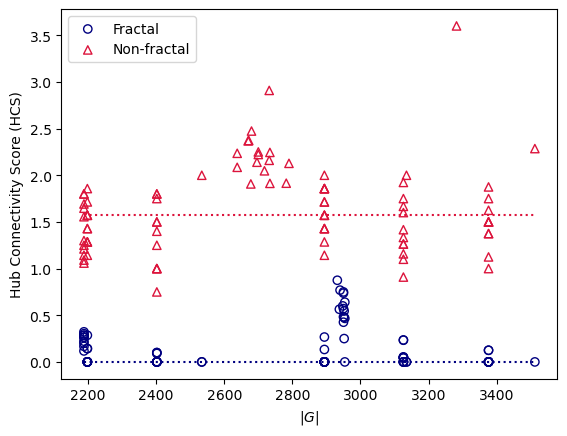

In [51]:
# Initialise an empty list for the fractal networks
fractal_HCSs = []

# Initialise an empty list for the non-fractal networks
non_fractal_HCSs = []

# Find the HCS of each fractal network
for graph in fractal_graphs:
    HCS = fn.calculate_HCS(graph)
    fractal_HCSs.append(HCS)
    
# Find the HCS of each non-fractal network
for graph in non_fractal_graphs:
    HCS = fn.calculate_HCS(graph)
    non_fractal_HCSs.append(HCS)
        
# Remove NaN values from the lists
clean_fractal_Ns, fractal_HCSs = fn.clean_lists_of_NaNs(fractal_Ns, fractal_HCSs)
clean_non_fractal_Ns, non_fractal_HCSs = fn.clean_lists_of_NaNs(non_fractal_Ns, non_fractal_HCSs)
        
# Plot the fractal result against the non-fractal result
fn.plot_scatter_graph(fractal_HCSs, non_fractal_HCSs, clean_fractal_Ns, clean_non_fractal_Ns, "Hub Connectivity Score (HCS)")

The following code plots the Hub Connectivity Score of the fractal networks against their random uncorrelated counterparts. 

In [72]:
G = fractal_graphs[12]
start = time.time()
copyG = G.copy()
copyG.rewire(1000)
end = time.time()
print(end-start)

start = time.time()
random_graph = fn.swap_edges_at_random(G, 1000)
end = time.time()
print(end-start)


0.007012844085693359
9.646111249923706


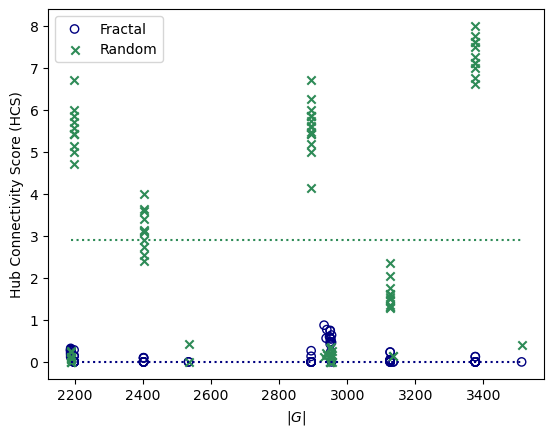

In [80]:
random_HCSs = []

for graph in fractal_graphs:
    random_graph = graph.copy()
    random_graph.rewire(graph.ecount())
    HCS = fn.calculate_HCS(random_graph)
    random_HCSs.append(HCS)
    
# Remove NaN values from the lists
clean_random_Ns, random_HCSs = fn.clean_lists_of_NaNs(fractal_Ns, random_HCSs)

fn.plot_scatter_graph_random_networks(fractal_HCSs, random_HCSs, clean_fractal_Ns, clean_random_Ns, "Hub Connectivity Score (HCS)")

**Mean Hub Distances**

The following code generates a figure showing the (normalised) mean hub distances in fractal and non-fractal networks (Figure 18). 

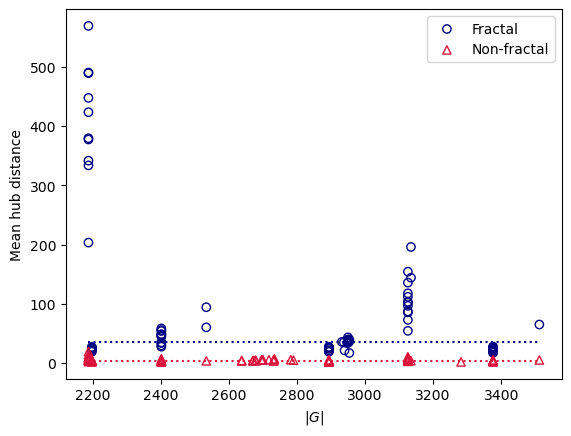

In [27]:
# Initialise an empty list for the fractal networks
fractal_mean_hub_distances = []

# Initialise an empty list for the non-fractal networks
non_fractal_mean_hub_distances = []

# Find the mean hub distance of each fractal network
for graph in fractal_graphs:
    mean_distance, _ = fn.mean_hub_distance(graph)
    fractal_mean_hub_distances.append(mean_distance)
    
# Find the mean hub distance of each non-fractal network
for graph in non_fractal_graphs:
    mean_distance, _ = fn.mean_hub_distance(graph)
    non_fractal_mean_hub_distances.append(mean_distance)
        
# Remove NaN values from the lists
clean_fractal_Ns, fractal_mean_hub_distances = fn.clean_lists_of_NaNs(fractal_Ns, fractal_mean_hub_distances)
clean_non_fractal_Ns, non_fractal_mean_hub_distances = fn.clean_lists_of_NaNs(non_fractal_Ns, non_fractal_mean_hub_distances)
        
# Plot the fractal result against the non-fractal result
fn.plot_scatter_graph(fractal_mean_hub_distances, non_fractal_mean_hub_distances, clean_fractal_Ns, clean_non_fractal_Ns, "Mean hub distance", )

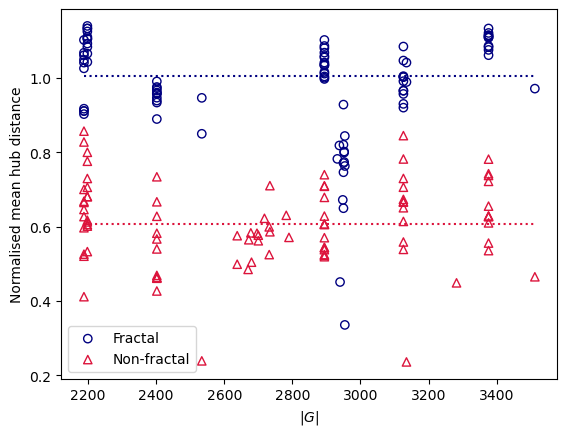

In [33]:
# Initialise an empty list for the fractal networks
fractal_mean_hub_distances = []

# Initialise an empty list for the non-fractal networks
non_fractal_mean_hub_distances = []

# Find the mean hub distance of each fractal network
for graph in fractal_graphs:
    mean_distance, _ = fn.mean_hub_distance(graph, normalised=True)
    fractal_mean_hub_distances.append(mean_distance)
    
# Find the mean hub distance of each non-fractal network
for graph in non_fractal_graphs:
    mean_distance, _ = fn.mean_hub_distance(graph, normalised=True)
    non_fractal_mean_hub_distances.append(mean_distance)
    
# Remove NaN values from the lists
clean_fractal_Ns, fractal_mean_hub_distances = fn.clean_lists_of_NaNs(fractal_Ns, fractal_mean_hub_distances)
clean_non_fractal_Ns, non_fractal_mean_hub_distances = fn.clean_lists_of_NaNs(non_fractal_Ns, non_fractal_mean_hub_distances)
        
# Plot the fractal result against the non-fractal result
fn.plot_scatter_graph(fractal_mean_hub_distances, non_fractal_mean_hub_distances, clean_fractal_Ns, clean_non_fractal_Ns, "Normalised mean hub distance")

<h2>8.2 Fractality of Skeletons

<h2>8.3 Betweenness Centrality and Degree Correlation

The code in this section plots a scatter graph of the correlation between the degree of nodes and their betweenness centrality (Figure 19). 

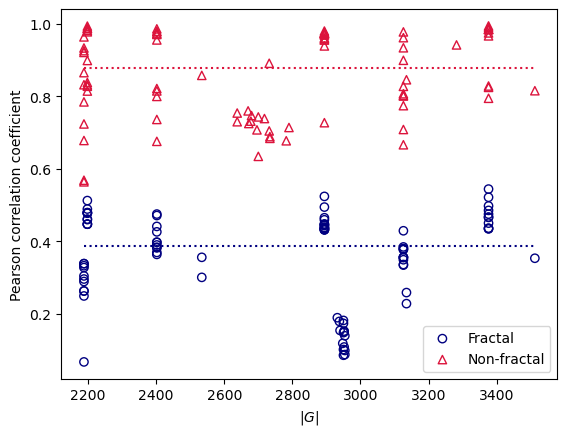

In [35]:
# Initialise an empty list for the fractal networks
fractal_correlation = []

# Initialise an empty list for the non-fractal networks 
non_fractal_correlation = []

# Find the correlation coefficient for each fractal network
for graph in fractal_graphs:
    r = fn.calc_betweenness_degree_correlation(graph)
    fractal_correlation.append(r)
    
# Find the correlation coefficient for each non-fractal network
for graph in non_fractal_graphs:
    r = fn.calc_betweenness_degree_correlation(graph)
    non_fractal_correlation.append(r)

fn.plot_scatter_graph(fractal_correlation, non_fractal_correlation, fractal_Ns, non_fractal_Ns, "Pearson correlation coefficient")

We can also plot the degree-betweenness centrality correlation coefficient for the hubs and non-hubs in the network, as in Figure 20.

C:\Users\hamil\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\hamil\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


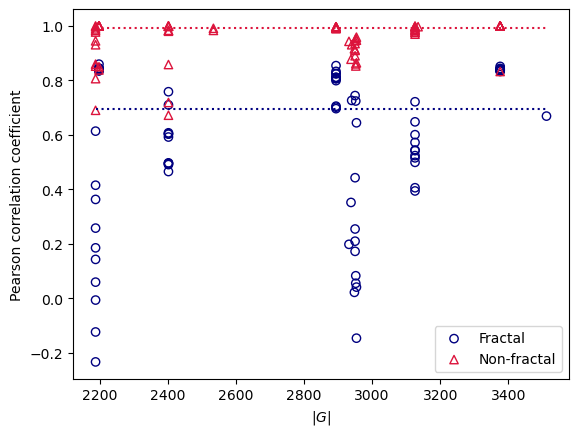

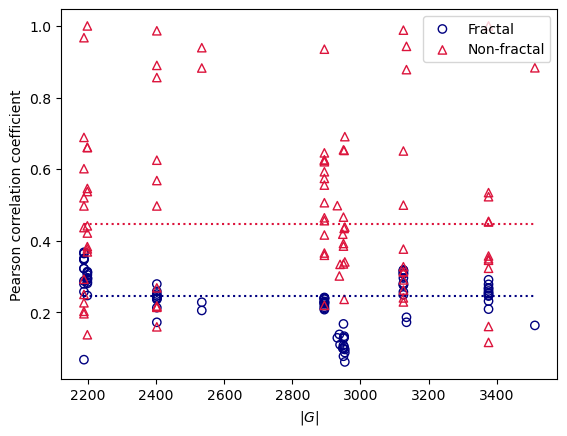

In [37]:
# Initialise lists for the fractal networks. 
fractal_hub_correlation = []
fractal_non_hub_correlation = []

# Iterate through all of the fractal networks.
for graph in fractal_graphs:
    # Find the degree-betweenness centrality correlation for hubs.
    hub_correlation = fn.calc_betweenness_degree_correlation_hubs(graph)
    # Find the degree-betweenness centrality correlation for non-hubs.
    non_hub_correlation = fn.calc_betweenness_degree_correlation_non_hubs(graph)
    
    # Add the correlation coefficients to the lists. 
    fractal_hub_correlation.append(hub_correlation)
    fractal_non_hub_correlation.append(non_hub_correlation)
        
# Initialise lists for the fractal networks. 
non_fractal_hub_correlation = []
non_fractal_non_hub_correlation = []

# Iterate through all of the fractal networks.
for graph in non_fractal_graphs:
    
    # Find the degree-betweenness centrality correlation for hubs.
    hub_correlation = fn.calc_betweenness_degree_correlation_hubs(graph)
    # Find the degree-betweenness centrality correlation for non-hubs.
    non_hub_correlation = fn.calc_betweenness_degree_correlation_non_hubs(graph)
    
    # Add the correlation coefficients to the lists. 
    non_fractal_hub_correlation.append(hub_correlation)
    non_fractal_non_hub_correlation.append(non_hub_correlation)
        
# Remove NaN values from the lists
clean_fractal_hub_Ns, fractal_hub_correlation = fn.clean_lists_of_NaNs(fractal_Ns, fractal_hub_correlation)
clean_fractal_non_hub_Ns, fractal_non_hub_correlation = fn.clean_lists_of_NaNs(fractal_Ns, fractal_non_hub_correlation)
clean_non_fractal_hub_Ns, non_fractal_hub_correlation = fn.clean_lists_of_NaNs(fractal_Ns, non_fractal_hub_correlation)
clean_non_fractal_non_hub_Ns, non_fractal_non_hub_correlation = fn.clean_lists_of_NaNs(fractal_Ns, non_fractal_non_hub_correlation)

fn.plot_scatter_graph(fractal_hub_correlation, non_fractal_hub_correlation, clean_fractal_hub_Ns, clean_non_fractal_hub_Ns, "Pearson correlation coefficient")
fn.plot_scatter_graph(fractal_non_hub_correlation, non_fractal_non_hub_correlation, clean_fractal_non_hub_Ns, clean_non_fractal_non_hub_Ns, "Pearson correlation coefficient")

The following cell finds different attributes of the betweenness centrality distributions of the hubs and non-hubs of fractal and non-fractal networks. 

In [39]:
# Initialise lists for the fractal hub properties
fractal_max_hub_bc = []
fractal_min_hub_bc = []
fractal_mean_hub_bc = []
fractal_stdv_hub_bc = []
fractal_hub_no_of_high_bc_nodes = []
fractal_mean_max_hub_bc = []

# Initialise lists for the fractal non-hub properties
fractal_max_non_hub_bc = []
fractal_min_non_hub_bc = []
fractal_mean_non_hub_bc = []
fractal_stdv_non_hub_bc = []
fractal_non_hub_no_of_high_bc_nodes = []
fractal_mean_max_non_hub_bc = []

# Initialise lists for the non-fractal hub properties
non_fractal_max_hub_bc = []
non_fractal_min_hub_bc = []
non_fractal_mean_hub_bc = []
non_fractal_stdv_hub_bc = []
non_fractal_hub_no_of_high_bc_nodes = []
non_fractal_mean_max_hub_bc = []

# Initialise lists for the non-fractal non-hub properties
non_fractal_max_non_hub_bc = []
non_fractal_min_non_hub_bc = []
non_fractal_mean_non_hub_bc = []
non_fractal_stdv_non_hub_bc = []
non_fractal_non_hub_no_of_high_bc_nodes = []
non_fractal_mean_max_non_hub_bc = []

# Iterate through each of the fractal graphs
for graph in fractal_graphs:
    # Find the betweenness centralities of the hubs and non-hubs in the network
    hub_bcs, non_hub_bcs = fn.find_hub_betweenness(graph)
    # Find key properties of the hub betweenness centrality distribution
    max_hub_bc, min_hub_bc, mean_hub_bc, stdv_hub_bc, hub_no_of_high_bc_nodes, mean_max_hub_bc = fn.analyse_betweenness_centrality(graph, bcs=hub_bcs)
    # Find key properties of the non-hub betweenness centrality distribution
    max_non_hub_bc, min_non_hub_bc, mean_non_hub_bc, stdv_non_hub_bc, non_hub_no_of_high_bc_nodes, mean_max_non_hub_bc = fn.analyse_betweenness_centrality(graph, bcs=non_hub_bcs)
    
    # Add the hub properties to their respective lists
    fractal_max_hub_bc.append(max_hub_bc)
    fractal_min_hub_bc.append(min_hub_bc)
    fractal_mean_hub_bc.append(mean_hub_bc)
    fractal_stdv_hub_bc.append(stdv_hub_bc)
    fractal_hub_no_of_high_bc_nodes.append(hub_no_of_high_bc_nodes)
    fractal_mean_max_hub_bc.append(mean_max_hub_bc)

    # Add the non-hub properties to their respective lists
    fractal_max_non_hub_bc.append(max_non_hub_bc)
    fractal_min_non_hub_bc.append(min_non_hub_bc)
    fractal_mean_non_hub_bc.append(mean_non_hub_bc)
    fractal_stdv_non_hub_bc.append(stdv_non_hub_bc)
    fractal_non_hub_no_of_high_bc_nodes.append(non_hub_no_of_high_bc_nodes)
    fractal_mean_max_non_hub_bc.append(mean_max_non_hub_bc)
    
# Iterate through each of the non-fractal graphs
for graph in non_fractal_graphs:
    # Find the betweenness centralities of the hubs and non-hubs in the network
    hub_bcs, non_hub_bcs = fn.find_hub_betweenness(graph)
    # Find key properties of the hub betweenness centrality distribution
    max_hub_bc, min_hub_bc, mean_hub_bc, stdv_hub_bc, hub_no_of_high_bc_nodes, mean_max_hub_bc = fn.analyse_betweenness_centrality(graph, bcs=hub_bcs)
    # Find key properties of the non-hub betweenness centrality distribution
    max_non_hub_bc, min_non_hub_bc, mean_non_hub_bc, stdv_non_hub_bc, non_hub_no_of_high_bc_nodes, mean_max_non_hub_bc = fn.analyse_betweenness_centrality(graph, bcs=non_hub_bcs)
    
    # Add the hub properties to their respective lists
    non_fractal_max_hub_bc.append(max_hub_bc)
    non_fractal_min_hub_bc.append(min_hub_bc)
    non_fractal_mean_hub_bc.append(mean_hub_bc)
    non_fractal_stdv_hub_bc.append(stdv_hub_bc)
    non_fractal_hub_no_of_high_bc_nodes.append(hub_no_of_high_bc_nodes)
    non_fractal_mean_max_hub_bc.append(mean_max_hub_bc)

    # Add the non-hub properties to their respective lists
    non_fractal_max_non_hub_bc.append(max_non_hub_bc)
    non_fractal_min_non_hub_bc.append(min_non_hub_bc)
    non_fractal_mean_non_hub_bc.append(mean_non_hub_bc)
    non_fractal_stdv_non_hub_bc.append(stdv_non_hub_bc)
    non_fractal_non_hub_no_of_high_bc_nodes.append(non_hub_no_of_high_bc_nodes)
    non_fractal_mean_max_non_hub_bc.append(mean_max_non_hub_bc)

The next cell plots the mean betweenness centrality of the hubs in the networks.

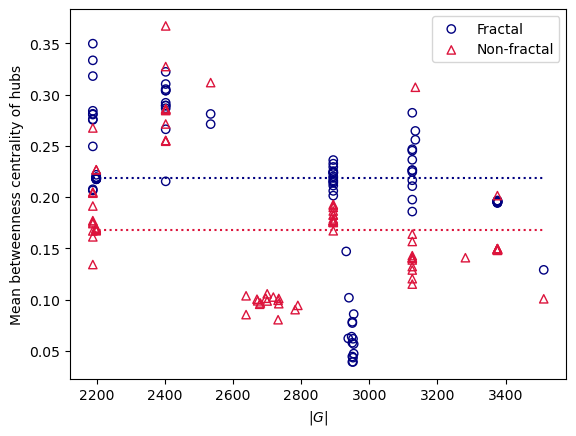

In [41]:
fn.plot_scatter_graph(fractal_mean_hub_bc, non_fractal_mean_hub_bc, fractal_Ns, non_fractal_Ns, "Mean betweenness centrality of hubs")

The next cell plots the mean betweenness centrality of the non-hubs in the networks.

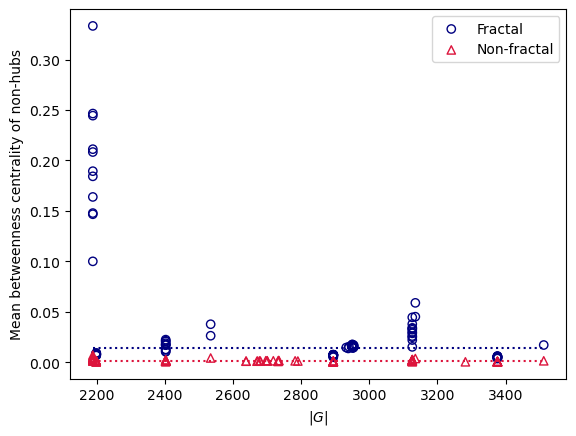

In [43]:
fn.plot_scatter_graph(fractal_mean_non_hub_bc, non_fractal_mean_non_hub_bc, fractal_Ns, non_fractal_Ns, "Mean betweenness centrality of non-hubs")

The following plots the standard deviation of the betweenness centrality distribution of hubs, as in Figure 21(a).

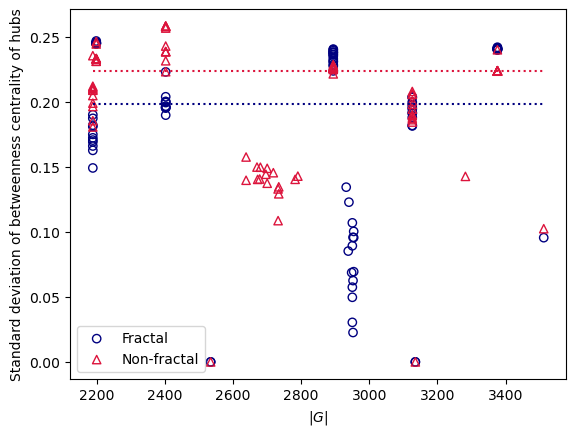

In [45]:
fn.plot_scatter_graph(fractal_stdv_hub_bc, non_fractal_stdv_hub_bc, fractal_Ns, non_fractal_Ns, "Standard deviation of betweenness centrality of hubs")

The following plots the standard deviation of the betweenness centrality distribution of non-hubs, as in Figure 21(b).

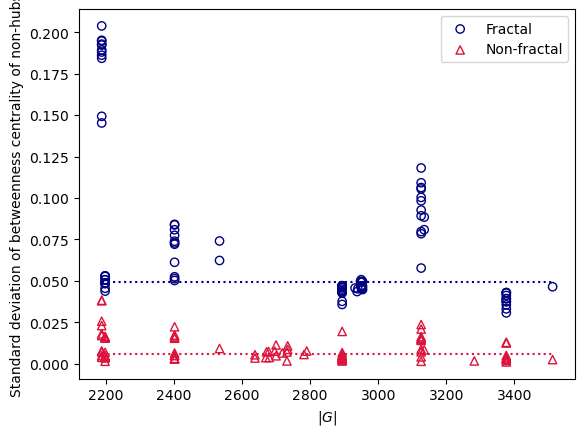

In [47]:
fn.plot_scatter_graph(fractal_stdv_non_hub_bc, non_fractal_stdv_non_hub_bc, fractal_Ns, non_fractal_Ns, "Standard deviation of betweenness centrality of non-hubs")

The next few figures are not included in the thesis. They plot the maximum betweenness centrality of hubs and non-hubs in fractal and non-fractal networks.

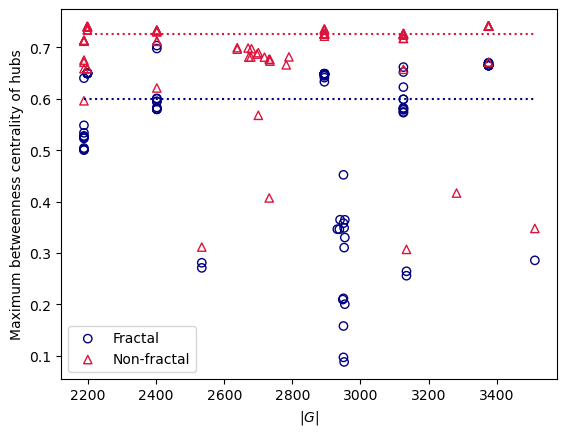

In [48]:
fn.plot_scatter_graph(fractal_max_hub_bc, non_fractal_max_hub_bc, fractal_Ns, non_fractal_Ns, "Maximum betweenness centrality of hubs")

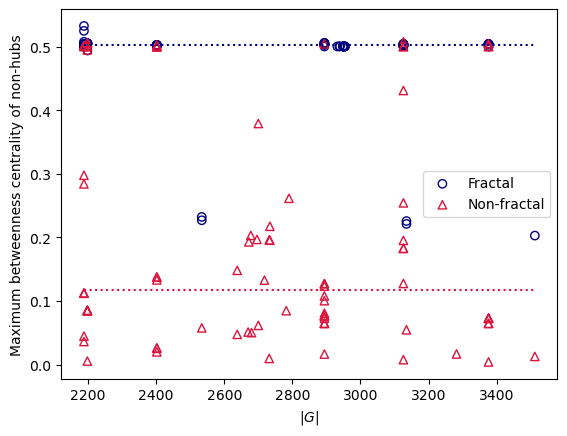

In [49]:
fn.plot_scatter_graph(fractal_max_non_hub_bc, non_fractal_max_non_hub_bc, fractal_Ns, non_fractal_Ns, "Maximum betweenness centrality of non-hubs")

The following code finds the mean betweenness centrality of the top 10% of hubs in the network. 

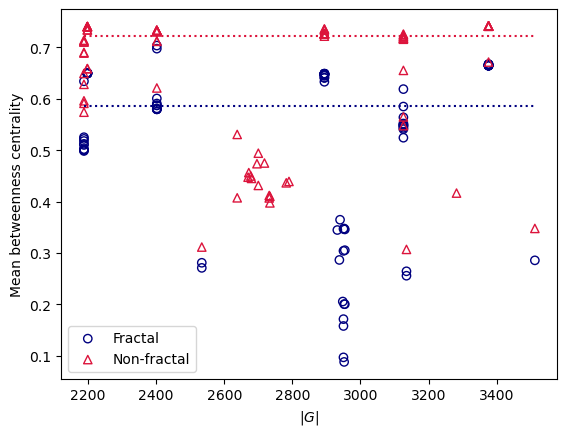

In [51]:
fn.plot_scatter_graph(fractal_mean_max_hub_bc, non_fractal_mean_max_hub_bc, fractal_Ns, non_fractal_Ns, "Mean betweenness centrality")

Finally, this cell plots the mean betweenness centrality of the top 10% of non-hubs in the network, as in Figure 23.

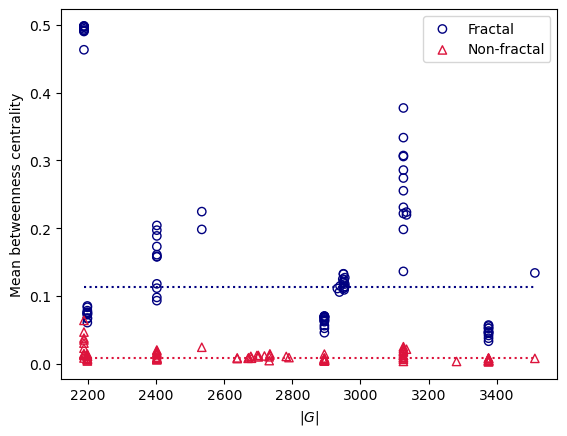

In [53]:
fn.plot_scatter_graph(fractal_mean_max_non_hub_bc, non_fractal_mean_max_non_hub_bc, fractal_Ns, non_fractal_Ns, "Mean betweenness centrality")

<h2> 8.4 Edge Betweenness Centrality

The following cell analyses the edge betweenness centrality distribution of fractal and non-fractal graphs.

In [ ]:
# Initialise lists for the fractal hub properties
fractal_max_ebc = []
fractal_min_ebc = []
fractal_mean_ebc = []
fractal_stdv_ebc = []
fractal_no_of_high_ebc_nodes = []
fractal_mean_max_ebc = []

# Initialise lists for the non-fractal hub properties
non_fractal_max_ebc = []
non_fractal_min_ebc = []
non_fractal_mean_ebc = []
non_fractal_stdv_ebc = []
non_fractal_no_of_high_ebc_nodes = []
non_fractal_mean_max_ebc = []

# Iterate through each of the fractal graphs
for graph in fractal_graphs:
    # Find the edge betweenness centralities
    ebcs = find_edge_betweenness_centralities(graph)
    # Find key properties of the hub betweenness centrality distribution
    max_bc, min_bc, mean_bc, stdv_bc, no_of_high_bc_nodes, mean_max_bc = analyse_betweenness_centrality(graph, bcs=ebcs)
    
    # Add the hub properties to their respective lists
    fractal_max_ebc.append(max_bc)
    fractal_min_ebc.append(min_bc)
    fractal_mean_ebc.append(mean_bc)
    fractal_stdv_ebc.append(stdv_bc)
    fractal_no_of_high_ebc_nodes.append(no_of_high_bc_nodes)
    fractal_mean_max_ebc.append(mean_max_bc)
    
    
# Iterate through each of the non-fractal graphs
for graph in non_fractal_graphs:
    # Find the edge betweenness centralities
    ebcs = find_edge_betweenness_centralities(graph)
    # Find key properties of the hub betweenness centrality distribution
    max_bc, min_bc, mean_bc, stdv_bc, no_of_high_bc_nodes, mean_max_bc = analyse_betweenness_centrality(graph, bcs=ebcs)
    
    # Add the hub properties to their respective lists
    non_fractal_max_ebc.append(max_bc)
    non_fractal_min_ebc.append(min_bc)
    non_fractal_mean_ebc.append(mean_bc)
    non_fractal_stdv_ebc.append(stdv_bc)
    non_fractal_no_of_high_ebc_nodes.append(no_of_high_bc_nodes)
    non_fractal_mean_max_ebc.append(mean_max_bc)

Figure 24(a) shows the maximum edge betweenness centralities in the networks.

In [ ]:
plot_scatter_graph(fractal_max_ebc, non_fractal_max_ebc, fractal_Ns, non_fractal_Ns, "Maximum edge betweenness centrality")

Figure 24(b) shows the mean edge betweenness centralities in the networks.

In [ ]:
plot_scatter_graph(fractal_mean_ebc, non_fractal_mean_ebc, fractal_Ns, non_fractal_Ns, "Maximum edge betweenness centrality")

Figure 24(c) shows the number of edges with high betweenness centrality in the networks.

In [ ]:
plot_scatter_graph(fractal_no_of_high_ebc_nodes, non_fractal_no_of_high_ebc_nodes, fractal_Ns, non_fractal_Ns, "Number of edges with high betweenness centrality")

The following cell finds the Pearson correlation coefficient between the edge betweenness centrality and the betweenness centrality of the endpoints and the degrees of the endpoints.

In [ ]:
# Initialise lists for the fractal networks
fractal_betweenness_correlation = []
fractal_degree_correlation = []

# Initialise lists for the non-fractal networks
non_fractal_betweenness_correlation = []
non_fractal_degree_correlation = []

# Find the correlation between the node and edge betweenness centrality for each fractal graph, 
#    and the correlation between the edge betweenness and degree
for graph in fractal_graphs:
    betweenness_correlation = edge_vertex_betweenness_correlation(graph)
    degree_correlation = edge_betweenness_degree_correlation(graph)
    fractal_betweenness_correlation.append(betweenness_correlation)
    fractal_degree_correlation.append(degree_correlation)
    
# Find the correlation between the node and edge betweenness centrality for each non-fractal graph, 
#    and the correlation between the edge betweenness and degree
for graph in non_fractal_graphs:
    betweenness_correlation = edge_vertex_betweenness_correlation(graph)
    degree_correlation = edge_betweenness_degree_correlation(graph)
    non_fractal_betweenness_correlation.append(betweenness_correlation)
    non_fractal_degree_correlation.append(degree_correlation)

Figure 25(a) plots the correlation between the edge betweenness centrality and the betweenness centrality of the endpoints. 

In [ ]:
plot_scatter_graph(fractal_betweenness_correlation, non_fractal_betweenness_correlation, fractal_Ns, non_fractal_Ns, "Pearson correlation coefficient")

Figure 25(b) plots the correlation between the edge betweenness centrality and the degree of the endpoints.

In [ ]:
plot_scatter_graph(fractal_degree_correlation, non_fractal_degree_correlation, fractal_Ns, non_fractal_Ns, "Pearson correlation coefficient")

<h1> References

[1] K. Hamilton, "Origins of Fractality in Complex Networks" *MSc Thesis* 